In [21]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
hbo_df = pd.read_csv('HBOmax.csv')

In [6]:
hbo_df

,tweet_id,created_at,tweets,likes
0,1379554521823711232,2021-04-06 22:00:03,"It’s A Sin, We Are Who We Are, Euphoria, and G...",174
1,1379554520330539008,2021-04-06 22:00:03,If you could be friends with somebody from the...,519
2,1379214807832870918,2021-04-05 23:30:09,The Fresh Prince of Bel-Air is now streaming o...,239
3,1379214804951433224,2021-04-05 23:30:08,First person to tell me how many times Jazz wa...,415
4,1379166582560104448,2021-04-05 20:18:31,"@WonderWomanFilm Jumping, climbing, pole vault...",107
...,...,...,...,...
3245,1316905442816253952,2020-10-16 00:54:59,@perforada My thoughts exactly.,0
3246,1316905393654726657,2020-10-16 00:54:47,"@jaileysmariano Well ready or not, it's coming!",0
3247,1316905307117920263,2020-10-16 00:54:26,@SerialCine Save the date!!!,1
3248,1316905222002921472,2020-10-16 00:54:06,@lucid_unicorn Yes! Perfect time to catch up.,0


In [7]:
#giving the date and time a new formart
hbo_df['created_at'] = pd.to_datetime(hbo_df['created_at'], errors='coerce')

In [8]:
#seperating date and time into seperate columns
hbo_df['date'] = hbo_df['created_at'].dt.date
hbo_df['time'] = hbo_df['created_at'].dt.time

In [9]:
hbo_df.head()

,tweet_id,created_at,tweets,likes,date,time
0,1379554521823711232,2021-04-06 22:00:03,"It’s A Sin, We Are Who We Are, Euphoria, and G...",174,2021-04-06,22:00:03
1,1379554520330539008,2021-04-06 22:00:03,If you could be friends with somebody from the...,519,2021-04-06,22:00:03
2,1379214807832870918,2021-04-05 23:30:09,The Fresh Prince of Bel-Air is now streaming o...,239,2021-04-05,23:30:09
3,1379214804951433224,2021-04-05 23:30:08,First person to tell me how many times Jazz wa...,415,2021-04-05,23:30:08
4,1379166582560104448,2021-04-05 20:18:31,"@WonderWomanFilm Jumping, climbing, pole vault...",107,2021-04-05,20:18:31


In [10]:
#getting tweets after the first of january 2021
hbo_df['date'] = pd.to_datetime(hbo_df['date'])
hbo_df[~(hbo_df['date'] < '2021-01-01')]

,tweet_id,created_at,tweets,likes,date,time
0,1379554521823711232,2021-04-06 22:00:03,"It’s A Sin, We Are Who We Are, Euphoria, and G...",174,2021-04-06,22:00:03
1,1379554520330539008,2021-04-06 22:00:03,If you could be friends with somebody from the...,519,2021-04-06,22:00:03
2,1379214807832870918,2021-04-05 23:30:09,The Fresh Prince of Bel-Air is now streaming o...,239,2021-04-05,23:30:09
3,1379214804951433224,2021-04-05 23:30:08,First person to tell me how many times Jazz wa...,415,2021-04-05,23:30:08
4,1379166582560104448,2021-04-05 20:18:31,"@WonderWomanFilm Jumping, climbing, pole vault...",107,2021-04-05,20:18:31
...,...,...,...,...,...,...
1219,1345112561520320512,2021-01-01 21:00:00,Your one and only source into the scandalous l...,981,2021-01-01,21:00:00
1220,1345097462629822465,2021-01-01 20:00:00,Starting the new year right by marathoning the...,1038,2021-01-01,20:00:00
1221,1345069804500049921,2021-01-01 18:10:06,Doctor Who is streaming now on HBO Max.,493,2021-01-01,18:10:06
1222,1344916273210146816,2021-01-01 08:00:01,"I know that from a non-linear, non-subjective ...",2743,2021-01-01,08:00:01


In [11]:
#function to remove and get hastags
def getHashtags(tweet):
    tweet = tweet.lower()  #has to be in place
    tweet = re.findall(r'\#\w+',tweet) # Remove hastags with REGEX
    return " ".join(tweet)

In [12]:
hbo_df['Hashtags'] = hbo_df['tweets'].apply(getHashtags)
hbo_df.head()

,tweet_id,created_at,tweets,likes,date,time,Hashtags
0,1379554521823711232,2021-04-06 22:00:03,"It’s A Sin, We Are Who We Are, Euphoria, and G...",174,2021-04-06,22:00:03,
1,1379554520330539008,2021-04-06 22:00:03,If you could be friends with somebody from the...,519,2021-04-06,22:00:03,
2,1379214807832870918,2021-04-05 23:30:09,The Fresh Prince of Bel-Air is now streaming o...,239,2021-04-05,23:30:09,
3,1379214804951433224,2021-04-05 23:30:08,First person to tell me how many times Jazz wa...,415,2021-04-05,23:30:08,
4,1379166582560104448,2021-04-05 20:18:31,"@WonderWomanFilm Jumping, climbing, pole vault...",107,2021-04-05,20:18:31,


In [13]:
hashtags_list = hbo_df['Hashtags'].tolist()

#iterate over all hashtags so they can be split where there is more than one hashtag per row
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Use the Built-in Python Collections module to determine Unique count of all hashtags used
from collections import Counter
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['Hashtags', 'Count']
hashtags_df.sort_values(by='Count', ascending=False, inplace=True)
print (f'Total Number of Unique Hashtags is: {hashtags_df.shape[0]}.')

Total Number of Unique Hashtags is: 132.


In [14]:
hashtags_df["Percentage"] = 100*(hashtags_df["Count"]/hashtags_df['Count'].sum())
hashtags_df = hashtags_df.head(10)

In [15]:
hashtags_df

,Hashtags,Count,Percentage
81,#ww84watchparty,26,9.122807
105,#freshprincereunion,24,8.421053
14,#snydercut,10,3.508772
18,#tomandjerrymovie,8,2.807018
83,#theflightattendant,7,2.456140
80,#ww84,7,2.456140
60,#wonderwoman1984,7,2.456140
1,#godzillavskong,7,2.456140
93,#theundoing,6,2.105263
32,#hbomax,6,2.105263


In [56]:
hbo_max = hbo_df[['Hashtags', 'likes']]

In [57]:
hbo_max

,Hashtags,likes
0,,174
1,,519
2,,239
3,,415
4,,107
...,...,...
3245,,0
3246,,0
3247,,1
3248,,0


In [58]:
hbo_max['Hashtags'].replace('', np.nan, inplace=True)

C:\Users\Ishola Taofeek\anaconda3\lib\site-packages\pandas\core\series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [59]:
hbo_max.dropna(subset=['Hashtags'], inplace=True)

<ipython-input-59-dc03010283cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbo_max.dropna(subset=['Hashtags'], inplace=True)


In [60]:
hbo_max = hbo_max.groupby(['Hashtags'])['likes'].sum().reset_index()

In [61]:
hbo_max

,Hashtags,likes
0,#1,1
1,#12dateshbomax,104
2,#13th,5
3,#20daysofkindness,2628
4,#24carrotholiday,1713
...,...,...
116,#wonderwoman1984,12564
117,#wonderwoman1984 #hbomax #wbpictures,18540
118,#wonderwomanday,2405
119,#ww84,5273


In [64]:
#finding tweets that have 2 hastags 
hbo_max = hbo_max.join(hbo_max['Hashtags'].str.split(' ', 1, expand=True).rename(columns={0:'Hashtags1', 1:'Hashtags2'}))

In [65]:
hbo_max

,Hashtags,likes,Hashtags1,Hashtags2
0,#1,1,#1,None
1,#12dateshbomax,104,#12dateshbomax,None
2,#13th,5,#13th,None
3,#20daysofkindness,2628,#20daysofkindness,None
4,#24carrotholiday,1713,#24carrotholiday,None
...,...,...,...,...
116,#wonderwoman1984,12564,#wonderwoman1984,None
117,#wonderwoman1984 #hbomax #wbpictures,18540,#wonderwoman1984,#hbomax #wbpictures
118,#wonderwomanday,2405,#wonderwomanday,None
119,#ww84,5273,#ww84,None


In [66]:
hbo_max = hbo_max.sort_values('likes', ascending=False)

In [67]:
hbo_max

,Hashtags,likes,Hashtags1,Hashtags2
78,#snydercut,85409,#snydercut,None
25,#freshprincereunion,73222,#freshprincereunion,None
120,#ww84watchparty,61879,#ww84watchparty,None
27,#freshprincereunion #hbomax,39917,#freshprincereunion,#hbomax
32,#godzillavskong,38326,#godzillavskong,None
...,...,...,...,...
94,#thelittlethings #goldenglobes #bestsupporting...,0,#thelittlethings,#goldenglobes #bestsupportingactor
73,#satcnextchapter #andjustlikethat,0,#satcnextchapter,#andjustlikethat
34,#grammy,0,#grammy,None
87,#tca21,0,#tca21,None


In [70]:
new_hbo_max = hbo_max[['Hashtags1', 'likes']]

In [71]:
new_hbo_max

,Hashtags1,likes
78,#snydercut,85409
25,#freshprincereunion,73222
120,#ww84watchparty,61879
27,#freshprincereunion,39917
32,#godzillavskong,38326
...,...,...
94,#thelittlethings,0
73,#satcnextchapter,0
34,#grammy,0
87,#tca21,0


In [73]:
new_hbo_max = new_hbo_max.groupby(['Hashtags1'])['likes'].sum().reset_index()

In [74]:
new_hbo_max

,Hashtags1,likes
0,#1,1
1,#12dateshbomax,104
2,#13th,5
3,#20daysofkindness,2628
4,#24carrotholiday,1713
...,...,...
105,#westwingspecial,577
106,#wonderwoman1984,31104
107,#wonderwomanday,2405
108,#ww84,5273


In [75]:
new_hbo_max = new_hbo_max.sort_values('likes', ascending=False)

In [78]:
new_hbo_max = new_hbo_max.head()

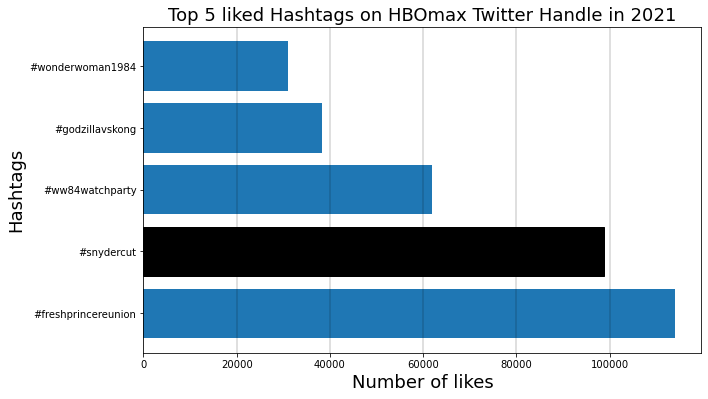

In [81]:
snydercut = plt.barh(new_hbo_max['Hashtags1'],new_hbo_max['likes'])
snydercut[1].set_color('black')
plt.title("Top 5 liked Hashtags on HBOmax Twitter Handle in 2021", fontsize=18)
plt.xlabel('Number of likes', fontsize=18)
plt.ylabel('Hashtags', fontsize=18)
plt.grid(color='black', axis='x', ls = '-', lw = 0.25)
plt.rcParams['figure.figsize'] = (10,6)
plt.savefig('HBOmax_Likes.png', bbox_inches = "tight")
plt.show()